
# Project: Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Trying to investigate dataset answer questions like 
    1) Which genres are most popular from year to year? 
    2) What kinds of properties are associated with movies that have high revenues?

#### Metrics  for Evaluating the Popular Movie
- popularity
- revenue

#### Potential Key to Affect the Success of a Movie
- Budget
- Director
- Genres


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set_style("whitegrid")
movie_df = pd.read_csv("tmdb-movies.csv")


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [3]:
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
df_budget_zero = movie_df.query('budget == 0')
print('There are {} total entries of movies zero budget in it'.format(len(df_budget_zero)))


There are 5696 total entries of movies zero budget in it


In [5]:
df_revenue_zero = movie_df.query('revenue == 0')
print('There are {} total entries of movies zero revenue in it'.format(len(df_revenue_zero)))

There are 6016 total entries of movies zero revenue in it


In [6]:
df_runtime_zero = movie_df.query('runtime == 0')
print('There are  {} total entries of movies zero run time in it'.format(len(df_runtime_zero)))

There are  31 total entries of movies zero run time in it




### Data Cleaning (null and duplicate removal)

#### Drop the duplicates.

In [7]:
movie_df.drop_duplicates(inplace=True)

#### Drop unnecessary colums 

In [8]:
delcol = ['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj']
movie_df.drop(delcol, axis=1, inplace=True)

#### Drop Zero Value Rows 

In [9]:
nanCol = ['genres', 'original_title', 'production_companies','runtime']
movie_df.dropna(subset = nanCol,inplace=True)

In [10]:
movie_df.query('runtime != 0', inplace=True)

#### Drop Null.

In [11]:
movie_df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      35
director                  20
keywords                1119
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

#### Replace zero values with null values in the budget and revenue column.

In [12]:
movie_df['budget'] = movie_df['budget'].replace(0, np.NaN)
movie_df['revenue'] = movie_df['revenue'].replace(0, np.NaN)
movie_df['director'] = movie_df['director'].replace(0, np.NaN)
# see if nulls are added in budget and revenue columns
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9813 entries, 0 to 10865
Data columns (total 15 columns):
id                      9813 non-null int64
popularity              9813 non-null float64
budget                  5031 non-null float64
revenue                 4753 non-null float64
original_title          9813 non-null object
cast                    9778 non-null object
director                9793 non-null object
keywords                8694 non-null object
runtime                 9813 non-null int64
genres                  9813 non-null object
production_companies    9813 non-null object
release_date            9813 non-null object
vote_count              9813 non-null int64
vote_average            9813 non-null float64
release_year            9813 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 1.2+ MB


In [13]:
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9813.000000,9813.000000,5.031000e+03,4.753000e+03,9813.000000,9813.000000,9813.000000,9813.000000
mean,63284.668195,0.692552,3.143083e+07,9.094012e+07,102.810965,238.460715,5.968980,2000.887700
std,90764.439472,1.035219,3.919122e+07,1.632537e+08,27.972648,601.896797,0.914309,13.033848
min,5.000000,0.000188,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,10258.000000,0.231418,6.000000e+06,8.493728e+06,90.000000,18.000000,5.400000,1994.000000
50%,18755.000000,0.417779,1.800000e+07,3.323126e+07,100.000000,46.000000,6.000000,2005.000000
75%,70587.000000,0.773909,4.000000e+07,1.015649e+08,112.000000,172.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

 

### Exploration based on review - Graphs 

In [38]:
def plot_data(data,column):
    print ('Mean:', data[column].mean())
    print ('Standard deviation:', data[column].std())
    print ('Minimum:', data[column].min())
    print ('Maximum:', data[column].max())
    plt.title(column)
    plt.xlabel("{} distribution".format(column))
    plt.ylabel("Density")
    plt.hist(data[column].dropna())
    plt.show()

Mean: 31430829.109123435
Standard deviation: 39191223.87135493
Minimum: 1.0
Maximum: 425000000.0


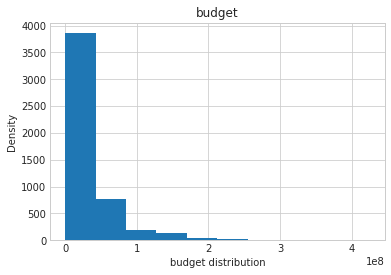

Mean: 90940120.4746476
Standard deviation: 163253692.76192957
Minimum: 2.0
Maximum: 2781505847.0


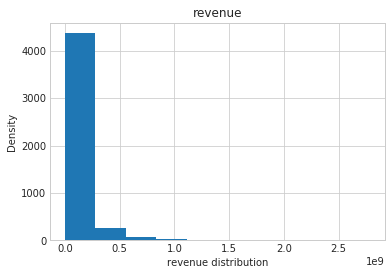

Mean: 0.6925520039743198
Standard deviation: 1.0352190393744558
Minimum: 0.000188
Maximum: 32.985763


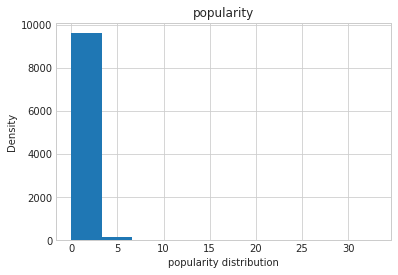

Mean: 102.81096504636706
Standard deviation: 27.972648287164596
Minimum: 2
Maximum: 877


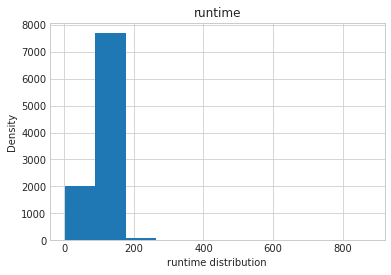

In [43]:
plot_data(movie_df,"budget")
plot_data(movie_df,"revenue")
plot_data(movie_df,"popularity")
plot_data(movie_df,"runtime")

### Check Popularity of movies over year !

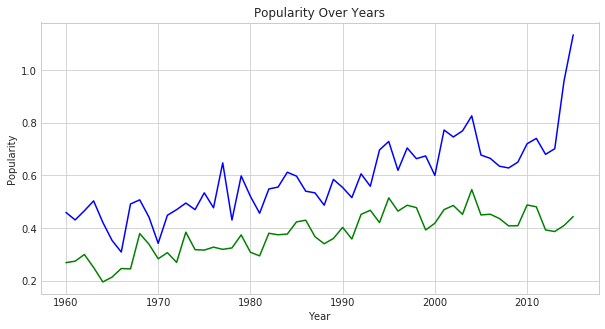

In [14]:
popularity_mean_df = movie_df.groupby('release_year').mean()['popularity']
popularity_median_df = movie_df.groupby('release_year').median()['popularity']
#mean_years = popularity_mean_df.index
#median_years = popularity_median_df.index
#sns.tsplot(popularity_mean_df)
#sns.barplot(x=popularity_mean_df.index, y=popularity_mean_df, ci = 100)
plt.figure(figsize=(10, 5))
plt.plot(popularity_mean_df.index, popularity_mean_df, color = 'b', label = 'mean')
plt.plot(popularity_median_df.index, popularity_median_df, color = 'g', label = 'median')
plt.title('Popularity Over Years')
plt.xlabel('Year')
plt.ylabel('Popularity');


### Popularity On genres over year

In [15]:
# Get unique Genre from the colum which has multiple genre split with |
def uniqueFromColumSplit(columnName):
    listFromSplit = movie_df[columnName].str.split('|').tolist()
    unique = []
    for i in listFromSplit:
        if i is not np.nan:
            for j in i:
                if j not in unique:
                    unique.append(j)
    return unique
# function to normaliz values in dataframe.            
def normalized(p):
    p_n = (p - p.mean()) / p.std(ddof = 0)
    return p_n
def binning(df,colName,labels):
    #Define min and max values:
    #create list by adding min and max to cut_points
    break_points = [df[colName].min()] + [df[colName].describe()[4]] + [df[colName].describe()[5]] + [df[colName].describe()[6]] + [df[colName].max()]

    #labels = ["low","medium","high","very high"]

    #Binning using cut function of pandas
    colBin = pd.cut(df[colName],bins=break_points,labels=labels,include_lowest=True)
    return colBin

In [16]:
#Build a data frame with genre and year
genre_unique = uniqueFromColumSplit("genres")
min_year = movie_df['release_year'].min()
max_year = movie_df['release_year'].max()
genre_df = pd.DataFrame(index = genre_unique, columns = range(min_year, max_year + 1)).fillna(value = 0)
#genre_df = pd.DataFrame(movie_df['genres'],index = movie_df['id']).stack()
#genre_df


In [17]:
for index, row in movie_df.iterrows():
    for genre in genre_unique:
        if genre in row['genres']:
            genre_df.loc[genre,row['release_year']] = genre_df.loc[genre,row['release_year']] +1
genre_df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,8,7,6,4,5,9,14,6,6,10,...,69,90,88,97,99,105,96,112,124,102
Adventure,5,6,7,7,5,6,11,6,5,5,...,52,56,58,68,58,57,49,63,66,65
Science Fiction,3,3,2,2,4,1,6,3,4,3,...,26,35,47,66,42,50,50,51,58,83
Thriller,6,0,7,10,9,10,8,5,5,3,...,100,118,118,145,123,133,148,165,170,160
Fantasy,2,1,1,2,3,0,2,3,5,2,...,30,45,38,46,40,39,33,35,35,31
Crime,2,2,3,4,10,2,5,7,5,3,...,50,64,57,52,46,45,52,67,59,47
Western,6,3,3,2,1,4,7,2,1,7,...,1,5,2,0,6,3,3,3,5,6
Drama,13,16,19,13,20,19,15,16,19,13,...,178,180,212,201,189,186,203,228,269,232
Family,3,4,2,3,4,3,6,3,5,4,...,54,40,48,54,48,63,40,44,41,41
Animation,0,1,0,1,2,1,2,2,3,2,...,34,30,31,45,47,40,38,39,35,38


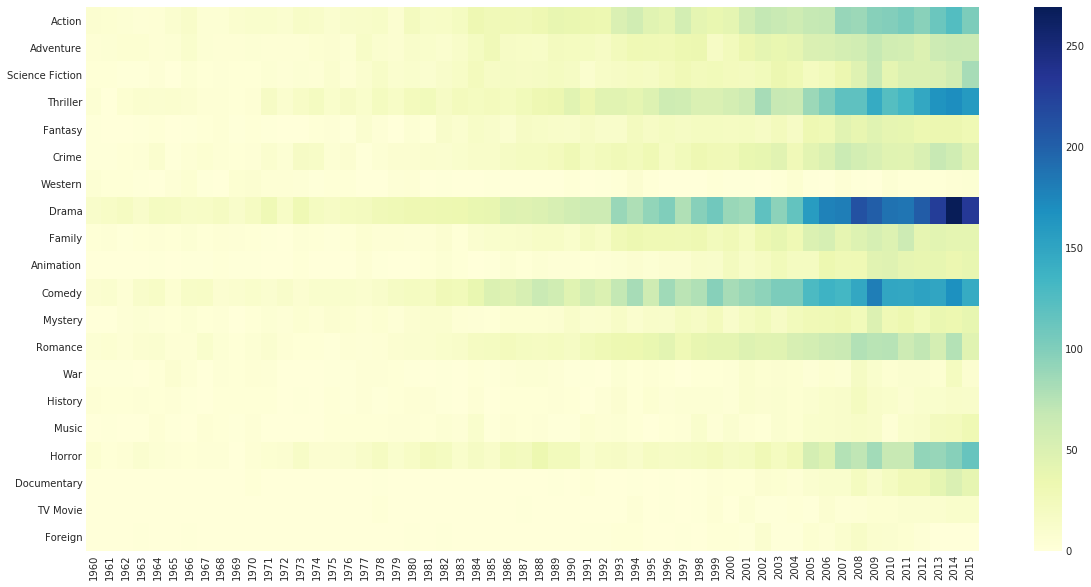

In [18]:
plt.figure(figsize=(20, 10))
sns.heatmap(genre_df,cmap="YlGnBu")

The above chart the number of movies in each genre over the years. We can interpret that most of movies released were in Drama followed by Comedy/Thriller and so on. Therefore the number of movies in the genre drama is higher than the others compared. The plot depicts the top ten genres and others depicts the count of movies in the remaining genres. Over the years there has been a spike in no of Drama , Comedy , Thriller , Action & Horror . Lets look at the parameters that influence this spike in Genre 

### Which genres are most popular from year to year? 

In [19]:
#Creating popularity DF to check popular df year on year 
popularity_df = pd.DataFrame(index = genre_unique, columns = range(min_year, max_year + 1)).fillna(value = 0)
for index, row in movie_df.iterrows():
    for genre in genre_unique:
        if genre in row['genres']:
            popularity_df.loc[genre,row['release_year']] = popularity_df.loc[genre,row['release_year']] +row['popularity']


popularity_df = normalized(popularity_df)


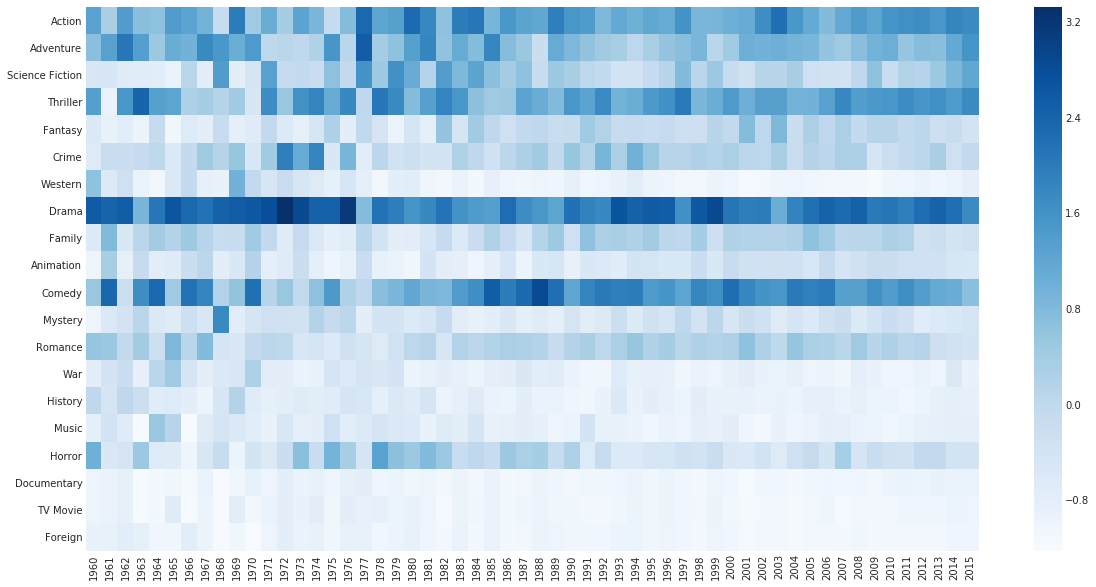

In [20]:
plt.figure(figsize=(20, 10))
sns.heatmap(popularity_df,cmap="Blues")

Over the years we can see the consistency on Drama , Comedy on popularity ! 

### What kinds of properties are associated with movies that have high revenues?

#### Budget vs Popularity 

In [21]:
labels = ["low","medium","high","very high"]
movie_df['budget_bin'] = binning(movie_df,"budget",labels)


In [22]:
#Building and ploting dataframe for revenue vs popularity 
budget_df = pd.DataFrame(index = labels, columns = range(min_year, max_year + 1)).fillna(value = 0)
for index, row in movie_df.iterrows():    
        if row['budget_bin'] is not np.nan:
            budget_df.loc[row['budget_bin'],row['release_year']] = budget_df.loc[row['budget_bin'],row['release_year']] + row['popularity']
budget_df = normalized(budget_df)
#budget_df

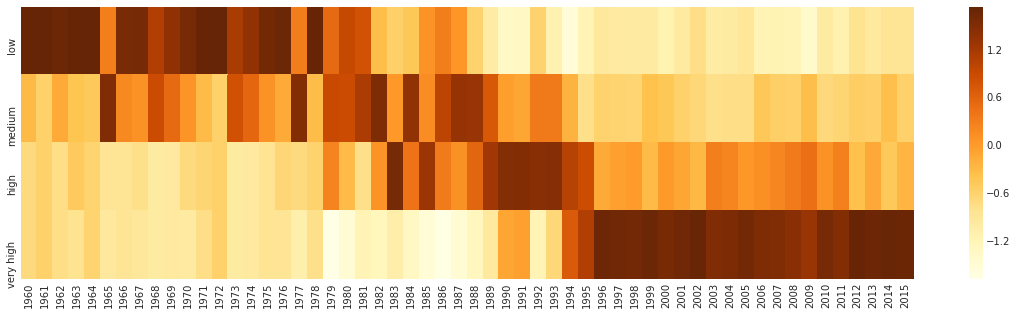

In [23]:
plt.figure(figsize=(20, 5))
sns.heatmap(budget_df,cmap="YlOrBr")

We can see that in olden days Movies with low budget have high popularity gradually the trend becomes that high budget movies have high popularity after 1996 . 
This could be also due to inflation not considered for old movies . 
We can conclude that High budget movies have high popularity 

#### Director vs Popularity 

In [24]:
unique_director = uniqueFromColumSplit("director")
unique_director[unique_director!='nan']
director_df = pd.DataFrame(index = unique_director, columns = ['popularity']).fillna(value = 0)

In [25]:
for index, row in movie_df.iterrows():        
    if row['director'] is not np.nan:
        for director in unique_director:           
            if director in row['director']:
                director_df.loc[director] = director_df.loc[director] + row['popularity']        
        
director_df            

,popularity
Colin Trevorrow,33.393773
George Miller,37.669654
Robert Schwentke,18.208219
J.J. Abrams,24.004784
James Wan,17.837628
Alejandro GonzÃ¡lez IÃ±Ã¡rritu,19.323837
Alan Taylor,13.766259
Ridley Scott,46.213770
Kyle Balda,11.174255
Pierre Coffin,15.124835


In [26]:
director_df = normalized(director_df)
director_df.sort_values('popularity',ascending=False).head(10)

,popularity
Christopher Nolan,17.203484
Steven Spielberg,15.179429
Quentin Tarantino,14.308525
Peter Jackson,13.569497
Ridley Scott,12.754018
George Miller,10.312804
Tim Burton,9.801767
David Fincher,9.401399
Robert Zemeckis,9.155647
Colin Trevorrow,9.091105


We can directly see that top Directors in industry making popularity top 10.
So Directors and thier stories too influnce Success of a movie . 

<a id='conclusions'></a>
## Conclusions

### The most popular genre in most of the years is Drama. 

From the heat map we can conclude the above . 

### The movie's budget plays a crucial role in the popularity of the film 

We might be limited to the data on budget / revenue since some are not given and not sure if inflation to 2015 was included 

A movie with medium budget in 1960 might be same as  very high in 2015 

But we can see that there is a direct relation between Budget and popularity 

### The movie's director also  crucial role in the popularity of the film 

This is a no brainer .. big budget , good directors = popular movies .. :) 


We can still Research other parameters like Duration , No of voters . 

#### Refrence : 
- https://www.kaggle.com/kevinmariogerard/tmdb-movie-dataset
- https://medium.com/@onpillow/01-investigate-tmdb-movie-dataset-python-data-analysis-project-part-1-data-wrangling-3d2b55ea7714